### Section 3: Equation stochastique pour le mouvement Brownien

**Introduction**

Rappelons que l'évolution d'une particule est donnée par: $dx=x(t+dt)-x(t)=ds$
Ou $ds$ décrit le déplacement résultant des collisions avec les molécules d'eau environnante. 

On peut alors modéliser $ds$ comme: $ds=\sqrt{2\alpha dt} N(0,1)$ avec $\alpha$ étant le même que dans l'équation de diffusion: $\frac{\partial \rho}{\partial t} = \alpha \frac{\partial² \rho}{\partial x²}$

Et à chaque instant dt, $N(0,1)$ est un nombre aléatoire généré à partir d'une distribution gaussienne $f(n)$, centrée en 0 et de variance 1. $$f(n)=\frac{1}{\sqrt{2\pi}} e^{-0.5n²}$$

On aimerait maintenant suivre un échantillon de nos molécules. On peut décrire leur densité à partir de leur position: $ \rho(x,t)dx = n(x,t)/N$  avec $n(x.t)$ qui représente à un instant donné le nombre de molécules dans un intervalle dx, centré en x et où N est le nombre total de molécule de l'échantillon.

Afin de tester ce modèle et de le comparer à la diffusion, on initialise la position de l'échantillon à l'aide d'une distribution gaussienne.

$$P(x) = \frac{1}{\sqrt{2\pi\sigma²}}e^{-\frac{(x-\mu)²}{2\sigma²}}$$

où $\sigma²$ est la variance et $\mu$ est la moyenne.

Or comme $n(x,0)=NP(x)dx$ on aura que $\rho (x,0)=P(x)$. Dans ce cas, la solution de l'ếq de diffusion est: $$\rho (x,t) = \frac{1}{\sqrt{2\pi\sigma_t²}}e^{-\frac{(x-\mu)²}{2\sigma_i²}}$$
avec $\sigma_t²=2\alpha t+\sigma²$

**Challenge**

Ajoutons maintenant une contribution systematique à $dx$: $dx=cdt + \sqrt{2\alpha dt}N(0,1)$, où $c$ est une constante et regardons à quoi ressemble la marche aléatoire. 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm 

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Afin de mieux voir l'influence de la constante sur la distribution, nous avons décidé de regarder ce qu'il se passe pour différents c. Par conséqunce nous avons dû rajouter une boucle, pour itérer sur nos différentes valeurs de c.

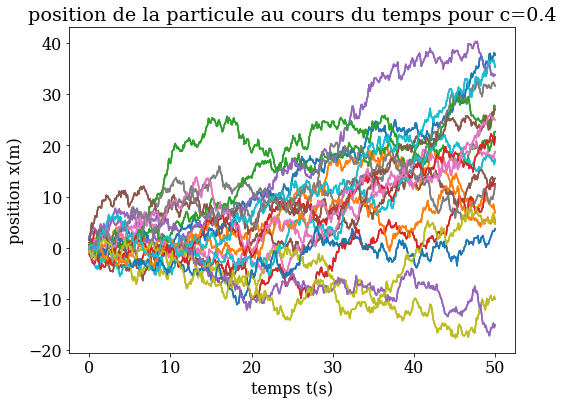

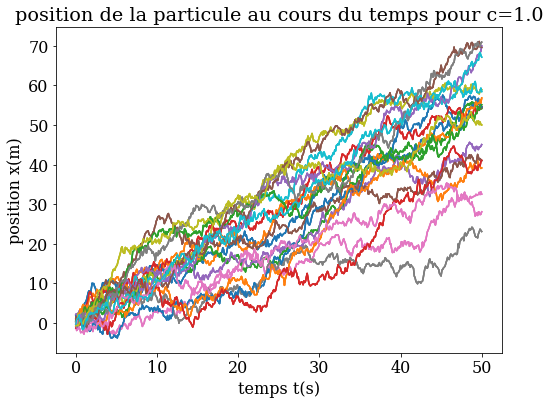

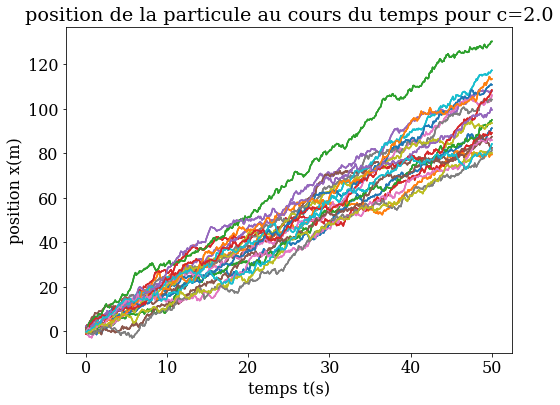

In [2]:
#commençons par suivre une particule, initialement au repos en x=0
sigma = 1  #écart-type
T=50.0   #durée totale de simulation

nt=500   #nb de pas de temps 
dt=T/nt  #interval de temps

alpha=2.0      #coeffitien de diffusion
c=[0.4,1.,2.]    #différentes constantes
npart=10000    #nombre de particules

#initialisation de nos paramètres
t = np.arange(0,T+dt, dt)
x = np.empty([nt+1, npart])
x0 = np.random.normal(loc=0,scale=sigma,size=npart) #initialement nos particules sont distribuées selon une loi normale
x[0]=x0

#itération pour différent c
for k,j in enumerate(c):
    #itération au cours du temps
    for i in range(nt):
        x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1, npart)+j*dt
   
    fig2, ax2 =plt.subplots(figsize=(8,6))
    plt.title("position de la particule au cours du temps pour c=%.1f" %j)
    for l in range(len(c)):
        for i in range(20):
            ax2.plot(t,x[:,i])
            plt.xlabel('temps t(s)')
            plt.ylabel('position x(m)')
            

On remarque que si c est très grand la trajectoire se rapproche d'une droite, et donc cette partie constante l'emporte sur la distribution aléatoire.

Trouvons l'équation qui gouverne l'évolution de la densité. Pour cela commencons par réexprimer notre équation en terme de $y=\sqrt{2\alpha t}N(0,1)$: 

$$y=\sqrt{2\alpha t}N(0,1)=x-ct$$

Or on sait que pour $y$ l'équation qui régit l'évolution de la densité est une équation de diffusion, donnée par: $$\frac{\partial \rho(y,t)}{\partial t} = \alpha \frac{\partial^2 \rho(y,t)}{\partial y^2}$$ 

On aimerait réexprimer cette équation en terme de x et t. Il va donc falloir effectuer des dérivées en chaînes:

$$\frac{\partial^2 \rho(y,t)}{\partial y^2}=\frac{\partial^2 \rho(x,t)}{\partial x^2}+\frac{1}{c^2}\frac{\partial^2 \rho(x,t)}{\partial t^2}-2\frac{1}{c}\frac{\partial^2 \rho(x,t)}{\partial x \partial t}$$

Comme on ne fait pas de changement par rapport au temps, on aura:

$$\frac{\partial \rho(y,t)}{\partial t} =\frac{\partial \rho(x,t)}{\partial t} $$

Ainsi l'équation qui va déterminer l'évolution sera:

$$\frac{\partial \rho(x,t)}{\partial t} = \alpha \left(\frac{\partial^2 \rho(x,t)}{\partial x^2}+\frac{1}{c^2}\frac{\partial^2 \rho(x,t)}{\partial t^2}-2\frac{1}{c}\frac{\partial^2 \rho(x,t)}{\partial x \partial t} \right)$$

et la solution sera donnée par:

$$\rho (y,t) = \frac{1}{\sqrt{2\pi\sigma_t²}}e^{-\frac{(y-\mu)²}{2\sigma_i²}}=\frac{1}{\sqrt{2\pi\sigma_t²}}e^{-\frac{(x-ct-\mu)²}{2\sigma_i²}}= \rho(x,t)$$

avec $\sigma_t²=2\alpha t+\sigma²$

On remarque donc que notre moyenne va changer $\mu'=\mu+ct$, mais notre variance restera la même.

Avant de regarder si cette solution ajuste effectivement bien nos histogrammes, nous allons définir une fonction qui nous permettra de changer les bins de nos histogrammes et graphiques dans la suite de ce mooc.

In [3]:
# création de bins centré atour de 0
def bins_creation(under,upper, binwidth):
    """permet de génerer des bins et le centre de ces bins
    under = borne inférieure
    upper = borne supérieure
    -------------
    returns bins et bin_centers
    """
    bins = np.arange(under,upper,binwidth)
    bins = bins + binwidth/2

    bin_centers = bins[:-1]+binwidth/2
    return bins, bin_centers

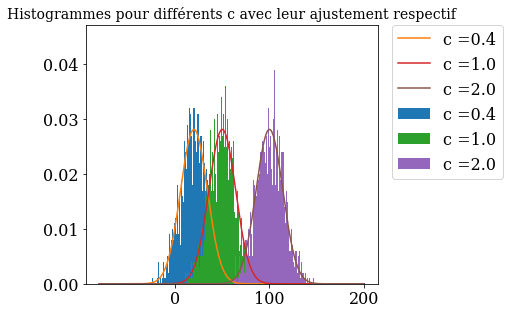

In [4]:
binwidth = 0.1
sigma = 1.0                        #la variance n'a pas changée et reste en 1
sigma2=2*alpha*T+sigma**2

#définissons les bornes de notre graphiques
c_min=np.min(c)
c_max=np.max(c)

bin_min=c_min*T-1/2*sigma2
bin_max=c_max*T+1/2*sigma2

#creation de bins centrés autour de 0
bins=bins_creation(bin_min,bin_max,binwidth)[0]
bin_centers=bins_creation(bin_min,bin_max,binwidth)[1]

x = np.empty([nt+1, npart])
for k,j in enumerate(c):
    x0 = np.random.normal(loc=0,scale=sigma,size=npart) #initialement nos particules sont distribuées selon une loi normale
    x[0]=x0
    for i in range(nt):
        x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1, npart)+j*dt
    
    #plot des histogrammes donnés par l'expression de départ
    plt.hist(x[nt], bins, normed=True, label="c =%.1f" %j);
    
    #plot de l'ajustement donné par notre solution
    plt.plot(bin_centers, np.exp(-(bin_centers-j*T)**2/(2.0*sigma2))/np.sqrt(2*np.pi*sigma2),label="c =%.1f" %j)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=1.0)
    plt.title('Histogrammes pour différents c avec leur ajustement respectif', fontsize=14)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)

Nous remarquons que nos histogrammes ne sont effectivement pas centrés en 0, mais qu'il s'éloignent de 0 de $cdt$. Nous remarquons aussi qu'ils ont tous la même forme, la largeur du pic est la même c'est-à-dire qu'ils ont la même variance.

Nous voyons que notre ajustement est bon et n'est pas spécifique à un c en particulier.

En conclusion le terme $cdt$ ajouté va modifier la moyenne, mais pas la variance.

**Challenge**

Cette fois-ci nous allons simuler une marche aléatoire avec un terme de friction:

$$dx = -\gamma x dt + \sqrt{2\alpha dt}N(0,1)$$

Et nous allons vérifier que pour $t \rightarrow \infty$ la distribution atteint un état stable.

Encore une fois, nous avons regarder ce qu'il se passe pour différentes valeurs de gamma.

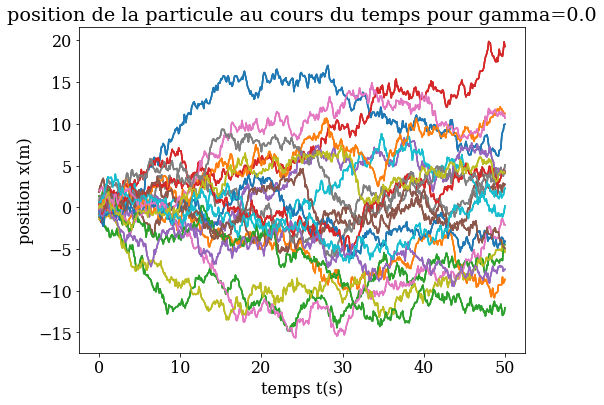

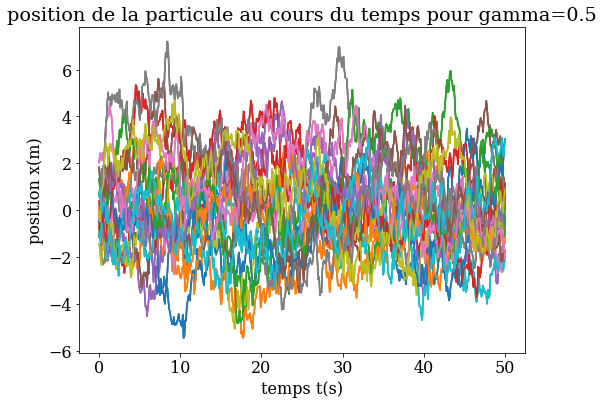

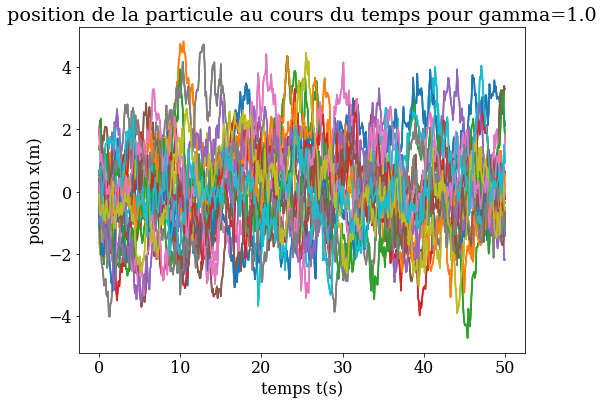

In [5]:
#commençons par suivre une particule, initialement au repos en x=0  

T_2 = 20.0   
npart = 10000    
nt_2 = 500   
dt_2 = T_2/nt_2  

alpha = 2.0       #coefficient de diffusion
gamma = [0,0.5,1]   #constantes

#initialisation des variables
t2 = np.arange(0,T_2+dt_2, dt_2)
x = np.empty([nt_2+1,npart])
x0 = np.random.normal(loc=0,scale=sigma,size=npart)
x[0] = x0

for k,j in enumerate(gamma):
    for i in range(nt_2):
        x[i+1] = x[i]+np.sqrt(2*alpha*dt_2)*np.random.normal(0,1,npart)-j*x[i]*dt_2
        
    fig2, ax2 = plt.subplots(figsize=(8,6))
    plt.title("position de la particule au cours du temps pour gamma=%.1f" %j)
    
    for l in range(len(gamma)):
        for i in range(20):    
            plt.plot(t,x[:,i])
            plt.xlabel('temps t(s)')
            plt.ylabel('position x(m)')

On remarque que plus gamma est grand, plus la position est distribuée uniformément. Le terme de friction l'emporte sur la distribution normale.

Regardons ce que donnent les histogrammes pour un gamma fixé, mais pour différents temps et essayons de voir à quoi ressemble notre distribution pour un très grand temps T (ce qui correspondra à $T \rightarrow \infty$).

Définissons une fonction pour calculer la position x[nt] et $\sigma_t^2$ pour différentes valeurs de nos paramètres.

In [6]:
def histo(gamma, alpha,nt, dt, npart):
    """
    Permet de calculer la postion au cours de temps pour différent paramètre
    
    Paramètres:
    -------------
    gamma:  float 
            constante
    alpha:  float
            constante
    nt: float
        pas de temps
    dt: float
        intervalle de temps
    
    Returns:
    --------------
    position x[nt]
    """
    
    x = np.empty([nt+1,npart])
    x0 = np.random.normal(loc=0,scale=sigma,size=npart)
    x[0]=x0
    for i in range(nt):
        x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart)-gamma*x[i]*dt
    return x

Nous allons maintenant faire les histogrammes pour différents $T$, mais ppour des $\gamma$ et $\alpha$ fixés. Nous avons choisi $\gamma = 0.5$ et $\alpha = 2.0$ de façon arbitraire. Pour le choix de gamma nous avons veillé à ne pas prendre une valeur trop proche de zéro, car alors la partie de la distribution normale l'aurait emporté sur le terme de friction et la stabilisation à de grand temps est alors très peu visible. Nous avons aussi choisi un $\gamma$ qui n'est pas trop grand pour éviter d'avoir le terme de friction qui domine tout dès le départ.

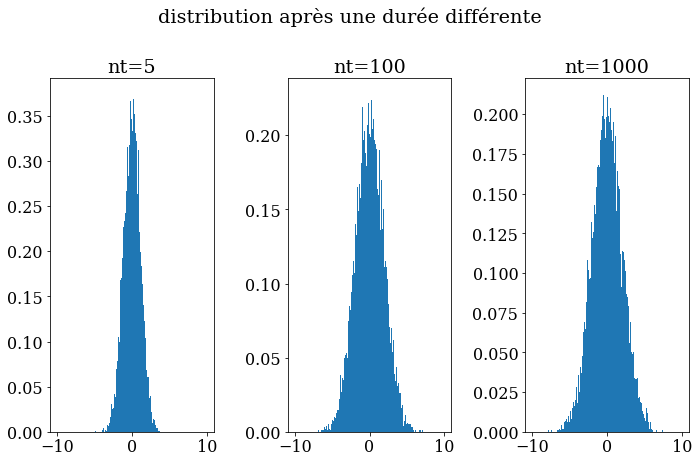

In [7]:
#détermination des bins pour nos différents histogrammes
bins1=bins_creation(-10,10,binwidth)[0] 

alpha1 = 2.0
gamma_demi = 0.5
npart2 = 10000
#différentes valeurs de temps de plus en plus grandes

T1 = 0.1
T2 = 2
T3 = 20

nt1 = 5
nt2 = 100
nt = 1000

dt = T3/nt #le rapport est toujours le même

fig = plt.figure(figsize=(10, 6))
fig.suptitle('distribution après une durée différente', y = 1.08)

plt.subplot(131)
plt.hist(histo(gamma_demi, alpha1,nt, dt, npart2)[nt1], bins1, normed = True);
plt.title("nt=%d" %nt1)

plt.subplot(132)
plt.hist(histo(gamma_demi, alpha1,nt, dt, npart2)[nt2], bins1, normed = True);
plt.title("nt=%d" %nt2)

plt.subplot(133)
plt.hist(histo(gamma_demi, alpha1,nt, dt, npart2)[nt], bins1, normed = True);
plt.title("nt=%d" %nt)

plt.tight_layout()

On remarque que pour $T \rightarrow \infty $, c'est-à-dire pour un temps d'itération de plus en plus grand, la distribution stagne et a la forme d'une gaussienne centrée en 0. La distribution atteint donc bel et bien un état stable et elle l'atteint même assez rapidement.

Malheureusement nous n'avons pas eu assez de temps pour réussir à trouver l'équation qui gouverne la densité dans ce cas et donc nous n'avons pas non plus réussi à trouver une solution à l'équation et donc pas d'ajustement à nos histogrammes.

Nous avons aussi fait varier le paramètre gamma pour voir quelle était son influence sur la distribution, la moyenne et la variance.

**Histogrammes pour différents gamma**

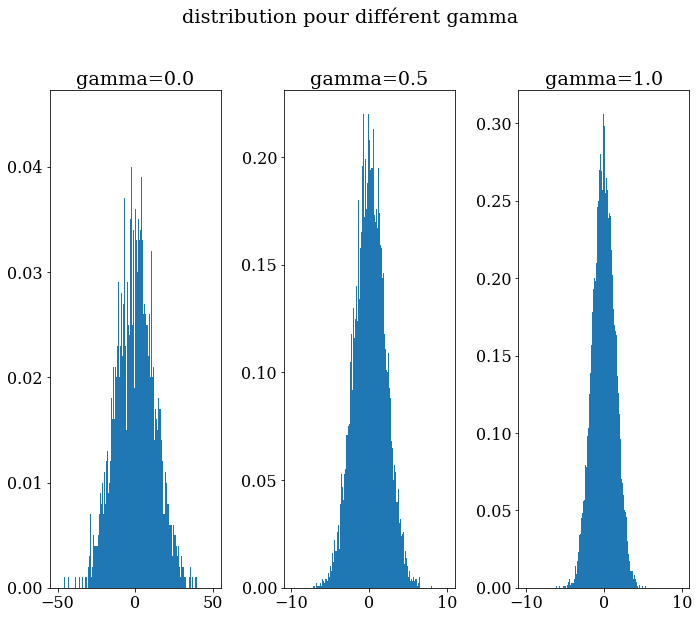

In [8]:
#détermination des bins pour nos différents histogrammes
bins1=bins_creation(-50,50,binwidth)[0]
bins2=bins_creation(-10,10,binwidth)[0]
bins3=bins_creation(-10,10,binwidth)[0]

gamma1 = gamma[0]
gamma2 = gamma[1]
gamma3 = gamma[2]

fig = plt.figure(figsize=(10, 8))
fig.suptitle('distribution pour différent gamma', y = 1.08)

plt.subplot(131)
plt.hist(histo(gamma1, alpha1,nt, dt_2, npart)[nt],bins1,normed=True);
plt.title("gamma=%.1f" %gamma[0])

plt.subplot(132)
plt.hist(histo(gamma2, alpha1,nt, dt_2, npart)[nt],bins2,normed=True);
plt.title("gamma=%.1f" %gamma[1])

plt.subplot(133)
plt.hist(histo(gamma3, alpha1,nt, dt_2, npart)[nt],bins3,normed=True);
plt.title("gamma=%.1f" %gamma[2])

plt.tight_layout()

Le premier gamma étant égal à zéro, notre première distribution n'est rien d'autre qu'une normale centré en zéro et d'écart-type 1. Puis, plus gamma augmente, plus la distribution s'affine. Cela implique que gamma aura tendance à faire diminuer la variance.

**Histogramme pour des particules initialement distribuées selon une gaussienne centrée en 20**

Regardons d'abord de quoi à l'aire notre distribution après nt itération.

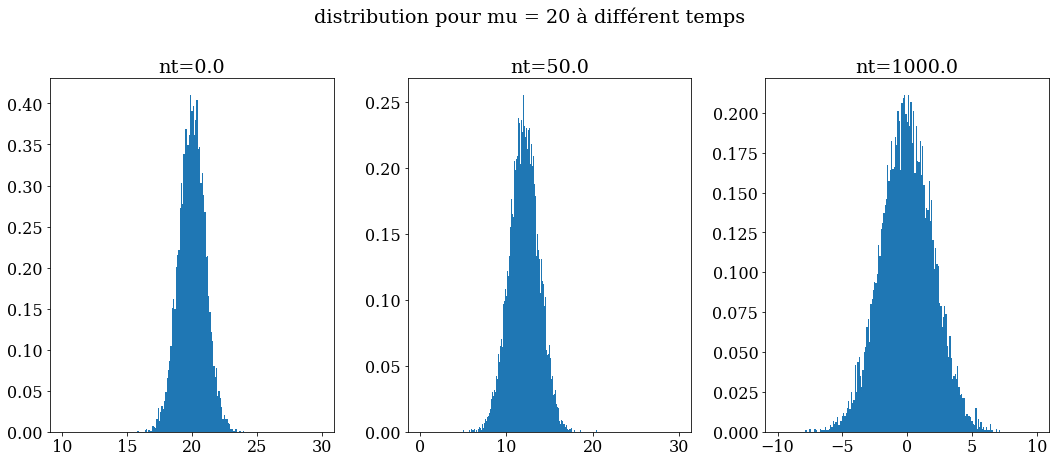

In [14]:
bins_mu1=bins_creation(-10,10,binwidth)[0]
bins_mu2=bins_creation(0,30,binwidth)[0]
bins_mu3=bins_creation(10,30,binwidth)[0]


#Définissons la distribution avec une distribution initiale centré en 20 et non 0
x=np.empty([nt+1,npart])
x0 = np.random.normal(loc=20,scale=sigma,size=npart)
x[0]=x0
for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart)-gamma2*x[i]*dt

    
fig = plt.figure(figsize=(15, 6))
fig.suptitle('distribution pour mu = 20 à différent temps', y = 1.08)

plt.subplot(131)   
plt.hist(x[0], bins_mu3, normed = True);
plt.title("nt=%.1f" %0)

plt.subplot(132)
plt.hist(x[50], bins_mu2, normed = True);
plt.title("nt=%.1f" %50)

plt.subplot(133)
plt.hist(x[nt], bins_mu1, normed = True);
plt.title("nt=%.1f" %nt)

plt.tight_layout()

Nous voyons donc qu'à $nt = 0$ la distribution est bien centré en 20 et plus on itère plus cette distribution se décale vers 0.

En conclusion on peut dire que le terme de friction va à la fois jouer sur la moyenne et sur l'écart-type. Il va forcer la moyenne à tendre vers 0 et il va forcer l'écart-type à tendre vers 0.